<a href="https://colab.research.google.com/github/seexub/machine_learing_problems/blob/main/moon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [52]:
data = make_moons(n_samples=1000, noise=0.2)
data

(array([[ 0.12416521,  0.72252149],
        [ 0.77336635,  0.6408864 ],
        [-0.80527444,  0.84114166],
        ...,
        [ 0.25465236,  0.01481553],
        [-0.34443055,  1.0625844 ],
        [ 0.11301074,  1.31914714]]),
 array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 

In [53]:
data[0].shape, data[1].shape

((1000, 2), (1000,))

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_data, test_data, train_labels, test_labels = train_test_split(data[0], data[1], test_size=0.2, random_state = 42)

In [56]:
train_data.shape, train_labels.shape

((800, 2), (800,))

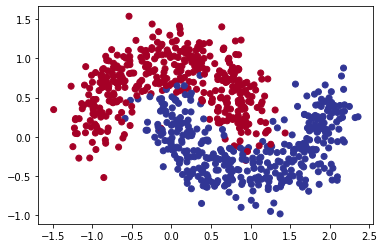

In [57]:
plt.scatter(train_data[:,0] , train_data[:,1], c=train_labels, cmap=plt.cm.RdYlBu)

In [67]:
moon_model = tf.keras.Sequential([
                                  tf.keras.layers.Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform()),
                                  tf.keras.layers.Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform()),
                                  tf.keras.layers.Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform()),
                                  tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [68]:
moon_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [69]:
cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [70]:
history = moon_model.fit(train_data, train_labels, epochs=200, callbacks=[cb])

Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.8062
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5398 - accuracy: 0.8438
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.8462
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.8475
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.8612
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8612
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8675
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8687
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8725
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8737
Epoch 11/

In [71]:
moon_model.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9700


[0.0860072523355484, 0.9700000286102295]

In [72]:
import pandas as pd

Text(0.5, 0, 'epochs')

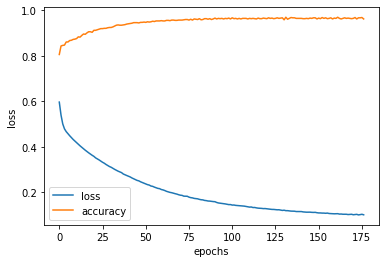

In [73]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [74]:
def plot_decision_boundary(model, X, y):
  
  x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)
  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...
doing binary classifcation...


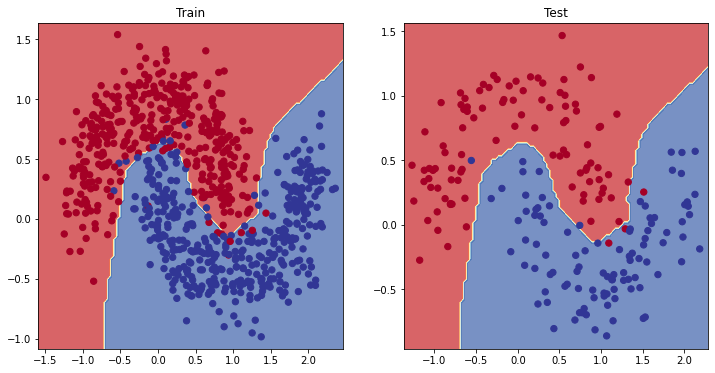

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, train_data, train_labels)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, test_data, test_labels)
plt.show()